In [1]:
%matplotlib inline
import networkx as nx

## グラフにおけるマッチング

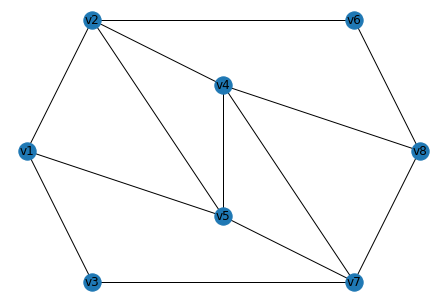

In [2]:
G1 = nx.Graph()
G1.add_nodes_from(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8'])
G1.add_edges_from([('v1', 'v2'), ('v1', 'v3'), ('v1', 'v5'), ('v2', 'v4'), ('v2', 'v5'), \
                   ('v2', 'v6'), ('v3', 'v7'), ('v4', 'v5'), ('v4', 'v7'), ('v4', 'v8'), \
                   ('v5', 'v7'), ('v6', 'v8'), ('v7', 'v8')])
pos1 = {'v1': (0, 0), \
        'v2': (5, 10), \
        'v3': (5, -10), \
        'v4': (15, 5), \
        'v5': (15, -5), \
        'v6': (25, 10), \
        'v7': (25,-10), \
        'v8': (30,0)}
nx.draw(G1, pos=pos1, with_labels=True)

In [3]:
# M が G のマッチングであるか判定する
def is_matching(G, M):
    m_degree = {v:0 for v in G.nodes()}
    for e in M:
        if not (G.has_node(e[0]) and G.has_node(e[1])):
#           print("Edge {0} is not an edge of the input").format(e)
            return False
        if not G.has_edge(*e):
#           print("Edge {0} is not an edge of the input").format(e)
            return False
        if m_degree[e[0]] == 1:
#           print("Vertex {0} is incident to multiple edges").format(e[0])
            return False
        if m_degree[e[1]] == 1:
#           print("Vertex {0} is incident to multiple edges").format(e[0])
            return False
        m_degree[e[0]] += 1
        m_degree[e[1]] += 1
    return True

In [4]:
M1 = [('v1', 'v2'), ('v4', 'v7'), ('v6', 'v8')]

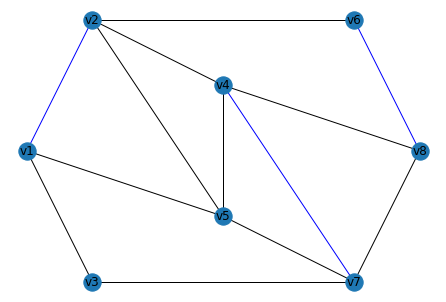

In [5]:
def edgecolor(graph, edgelist, color):
    return list(map(lambda e: color if e in edgelist or e[::-1] in edgelist else 'black', graph.edges()))
nx.draw(G1, pos=pos1, edge_color = edgecolor(G1, M1, 'blue'), with_labels=True)

In [6]:
is_matching(G1, M1)

True

In [7]:
M2 = [('v1', 'v3'), ('v2', 'v5'), ('v2', 'v6')]

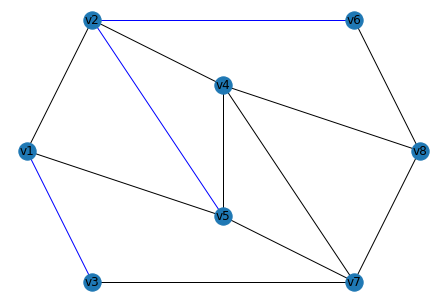

In [8]:
nx.draw(G1, pos=pos1, edge_color = edgecolor(G1, M2, 'blue'), with_labels=True)

In [9]:
is_matching(G1, M2)

False

In [10]:
# M が G の極大マッチングであるか判定する
def is_maximal_matching(G, M):
    if not is_matching(G, M):
        print("The input is not a matching".format(e))
        return False
    for e in G.edges():
        if e in M:
            continue
        M.append(e)
        if is_matching(G, M):
            print("Adding {0} results in a matching".format(e))
            return False
        M.remove(e)
    return True

In [11]:
is_maximal_matching(G1, M1)

True

In [12]:
M3 = [('v1', 'v2'), ('v3', 'v7'), ('v6', 'v8')]

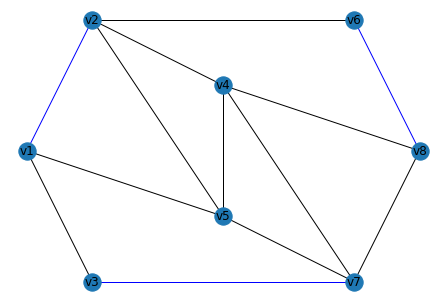

In [13]:
nx.draw(G1, pos=pos1, edge_color = edgecolor(G1, M3, 'blue'), with_labels=True)

In [14]:
is_maximal_matching(G1, M3)

Adding ('v4', 'v5') results in a matching


False

In [15]:
# M が G の完全マッチングであるか判定する
def is_perfect_matching(G, M):
    m_degree = {v:0 for v in G.nodes()}
    for e in M:
        if not (G.has_node(e[0]) and G.has_node(e[1])):
            return False
        if not G.has_edge(*e):
            return False
        if m_degree[e[0]] == 1 or m_degree[e[1]] == 1:
            return False
        m_degree[e[0]] += 1
        m_degree[e[1]] += 1
    for v in G.nodes():
        if m_degree[v] == 0:
            return False 
    return True

In [16]:
is_perfect_matching(G1, M1)

False

In [17]:
M4 = [('v1', 'v2'), ('v3', 'v7'), ('v4', 'v5'), ('v6', 'v8')]
is_perfect_matching(G1, M4)

True

In [18]:
# グラフの頂点数は，その完全マッチングの辺数の2倍に等しい
nx.number_of_nodes(G1) == len(M4) * 2

True

In [19]:
# 最大マッチングの計算 (結果は辞書)
M5 = nx.max_weight_matching(G1)
M5

{('v1', 'v5'), ('v2', 'v6'), ('v7', 'v3'), ('v8', 'v4')}

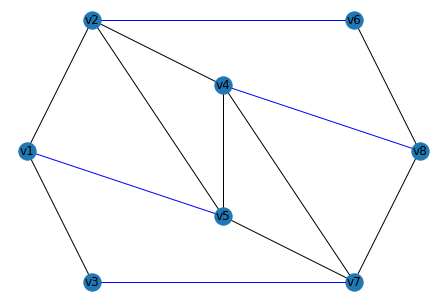

In [20]:
nx.draw(G1, pos=pos1, edge_color = edgecolor(G1, M5, 'blue'), with_labels=True)

## 最大マッチングと増加道

In [21]:
# G において P が M に関する交互道であるか判定する
# P が G における道であることは前提条件として仮定 (プログラムの中でチェックしない)
# P は頂点のリスト
def is_alternating_path(G, M, P):
    if len(P) <= 2:
        return True
    if (P[0], P[1]) in M:
        alt = 1
    else:
        alt = 0
    for i in range(1, len(P)-1):
        if ((P[i], P[i+1]) in M or (P[i+1], P[i]) in M) and alt == 0:
            alt = 1
        elif (not ((P[i], P[i+1]) in M) or (not (P[i+1], P[i]) in M)) and alt == 1:
            alt = 0
        else:
            return False
    return True

In [22]:
is_alternating_path(G1, M1, ['v3', 'v1', 'v2', 'v4', 'v7'])

True

In [23]:
# G において P が M に関する増加道であるか判定する
# P が G における道であることは前提条件として仮定 (プログラムの中でチェックしない)
# P は頂点のリスト
def is_augmenting_path(G, M, P):
    if not is_alternating_path(G, M, P):
        return False
    else:
        for v in G[P[0]]:
            if (P[0], v) in M or (v, P[0]) in M:
                return False
        for v in G[P[-1]]:
            if (P[-1], v) in M or (v, P[-1]) in M:
                return False
    return True

In [24]:
is_augmenting_path(G1, M1, ['v3', 'v7', 'v4', 'v8'])

False

In [25]:
is_augmenting_path(G1, M1, ['v3', 'v7', 'v4', 'v5'])

True

### 2つのマッチングの対称差

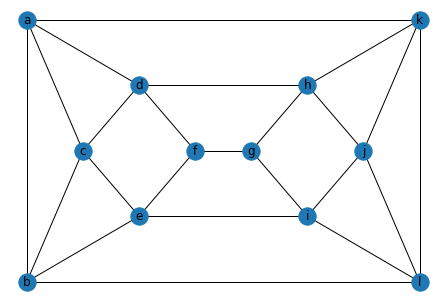

In [26]:
G2 = nx.Graph()
G2.add_nodes_from(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l'])
G2.add_edges_from([('a', 'b'), ('a', 'c'), ('a', 'd'), ('a', 'k'), ('b', 'c'), \
                   ('b', 'e'), ('b', 'l'), ('c', 'd'), ('c', 'e'), ('d', 'f'), \
                   ('d', 'h'), ('e', 'f'), ('e', 'i'), ('f', 'g'), ('g', 'h'), \
                   ('g', 'i'), ('h', 'j'), ('h', 'k'), ('i', 'j'), ('i', 'l'), \
                   ('j', 'k'), ('j', 'l'), ('k', 'l')])
pos2 = {'a': (0, 4), 'b': (0, 0), 'c': (1, 2), 'd': (2, 3), 'e': (2, 1), 'f': (3, 2), \
        'g': (4, 2), 'h': (5, 3), 'i': (5, 1), 'j': (6, 2), 'k': (7, 4), 'l': (7, 0)}
nx.draw(G2, pos=pos2, with_labels=True)

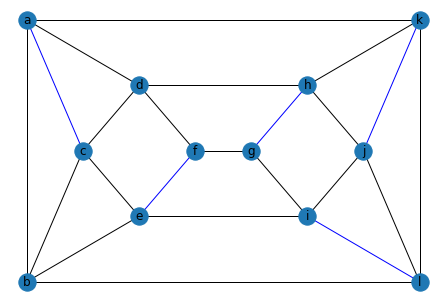

In [27]:
M6 = [('a', 'c'), ('e', 'f'), ('g', 'h'), ('i', 'l'), ('j', 'k')]
nx.draw(G2, pos=pos2, edge_color = edgecolor(G2, M6, 'blue'), with_labels=True)

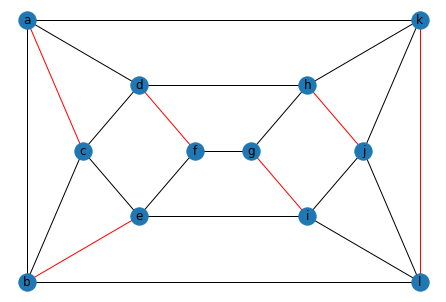

In [28]:
M7 = [('a', 'c'), ('b', 'e'), ('d', 'f'), ('g', 'i'), ('h', 'j'), ('k', 'l')]
nx.draw(G2, pos=pos2, edge_color = edgecolor(G2, M7, 'red'), with_labels=True)

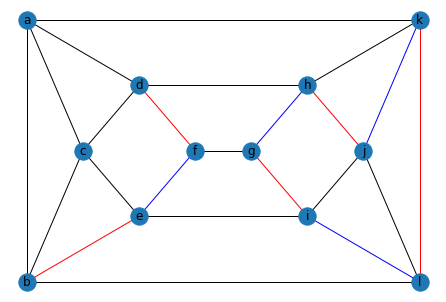

In [29]:
# 対称差の計算
symmdiff = [e for e in M6 + M7 if not (e in M6 and e in M7)]
# 対称差の図示
def edgecolor_symmdiff(graph, edgelist1, edgelist2, sd, color1, color2):
    return list(map(lambda e: color1 if (e in edgelist1 and e in sd) or (e[::-1] in edgelist1 and e[::-1] in sd) else \
                              (color2 if (e in edgelist2 and e in sd) or (e[::-1] in edgelist2 and e[::-1] in sd) else 'black'), graph.edges()))
nx.draw(G2, pos=pos2, edge_color = edgecolor_symmdiff(G2, M6, M7, symmdiff, 'blue', 'red'), with_labels=True)

In [30]:
is_augmenting_path(G2, M6, ['b', 'e', 'f', 'd'])

True

## 最大マッチングと最小頂点被覆

In [31]:
# C が G の頂点被覆であるか判定する
def is_vertex_cover(G, C):
    for v in C:
        if not G.has_node(v):
            return False
    for e in G.edges():
        if not (e[0] in C or e[1] in C):
            print("Edge {0} is not covered".format(e))
            return False
    return True          

In [32]:
C1 = ['v2', 'v3', 'v4', 'v5', 'v6', 'v7']

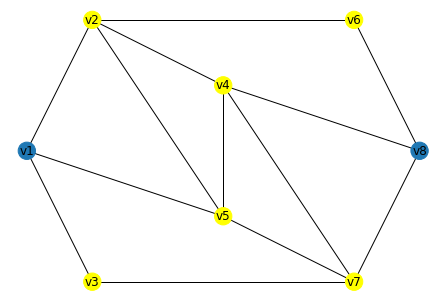

In [33]:
def nodecolor(graph, nodelist, color):
    return list(map(lambda v: color if v in nodelist else "#1f78b4", graph.nodes()))
nx.draw(G1, pos=pos1, node_color = nodecolor(G1, C1, 'yellow'), with_labels=True)

In [34]:
is_vertex_cover(G1, C1)

True

In [35]:
C2 = ['v1', 'v2', 'v3', 'v5', 'v8']

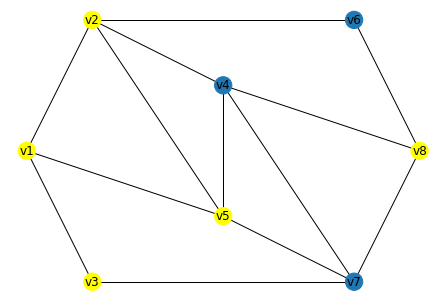

In [36]:
nx.draw(G1, pos=pos1, node_color = nodecolor(G1, C2, 'yellow'), with_labels=True)

In [37]:
is_vertex_cover(G1, C2)

Edge ('v4', 'v7') is not covered


False